**Chapter 10 – Introduction to Artificial Neural Networks with Keras**


# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

<ipython-input-2-d41b10f4d90b>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


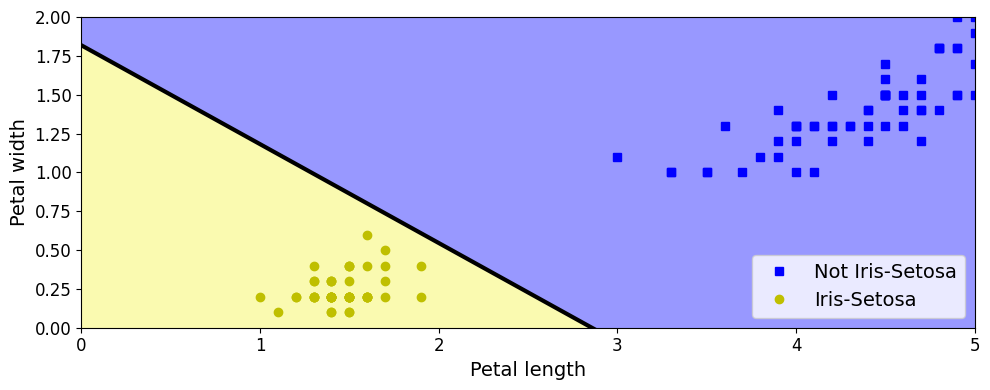

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


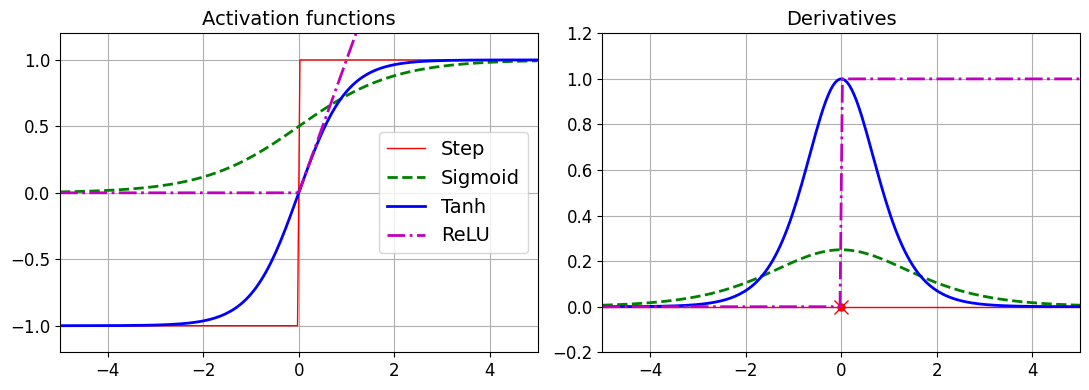

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

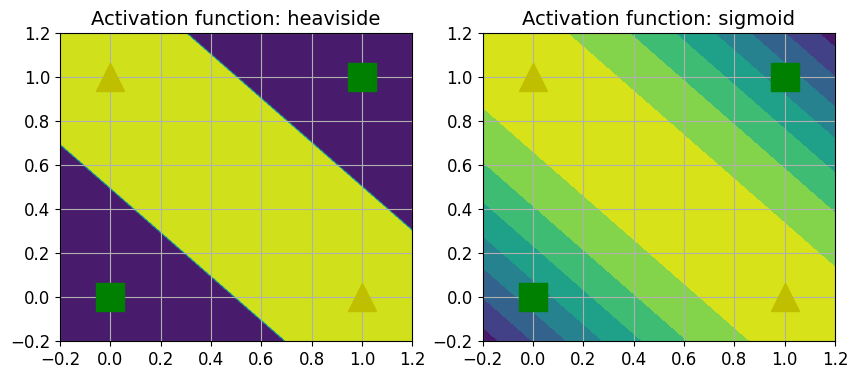

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [9]:
import tensorflow as tf
from tensorflow import keras

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [11]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [12]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [13]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

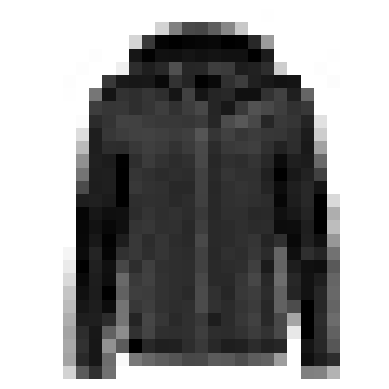

In [14]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [15]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [17]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [18]:
X_valid.shape

(5000, 28, 28)

In [19]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


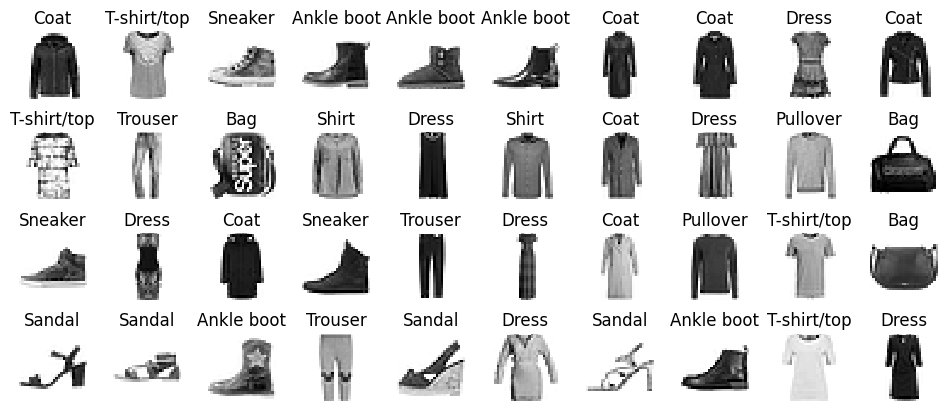

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [22]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.layers

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


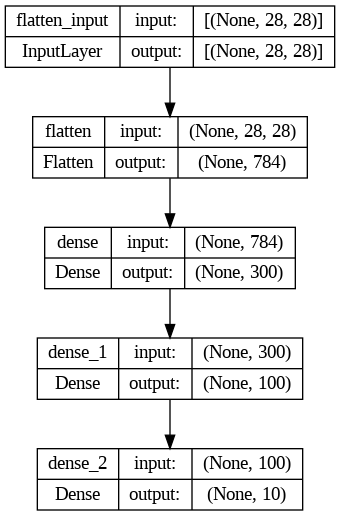

In [26]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [27]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [28]:
model.get_layer(hidden1.name) is hidden1

True

In [29]:
weights, biases = hidden1.get_weights()

In [30]:
weights

array([[ 0.03935182, -0.00568509,  0.04456134, ..., -0.04472144,
         0.01385336, -0.06954481],
       [ 0.05543537, -0.01577787,  0.01107065, ...,  0.03423309,
        -0.07222459,  0.03757048],
       [ 0.03643458,  0.05729105, -0.05816035, ...,  0.04279869,
         0.04372298,  0.03418379],
       ...,
       [-0.03743792,  0.02169196, -0.04207996, ..., -0.06224807,
        -0.05891868, -0.06371361],
       [ 0.02111243, -0.01625327, -0.07298836, ...,  0.04305568,
         0.02024416,  0.01879739],
       [-0.03151266,  0.05980138,  0.01707587, ..., -0.06843361,
        -0.05422036,  0.07326008]], dtype=float32)

In [31]:
weights.shape

(784, 300)

In [32]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [33]:
biases.shape

(300,)

In [34]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [35]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 19s 10ms/step - loss: 0.7172 - accuracy: 0.7654 - val_loss: 0.5257 - val_accuracy: 0.8222
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4867 - accuracy: 0.8291 - val_loss: 0.4352 - val_accuracy: 0.8508
Epoch 3/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4410 - accuracy: 0.8448 - val_loss: 0.5488 - val_accuracy: 0.7922
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4148 - accuracy: 0.8549 - val_loss: 0.3968 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3956 - accuracy: 0.8614 - val_loss: 0.3787 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3773 - accuracy: 0.8669 - val_loss: 0.3742 - val_accuracy: 0.8740
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3648 - accuracy: 0.8709 - val_loss: 0.3698 - val_a

In [36]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [37]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [38]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


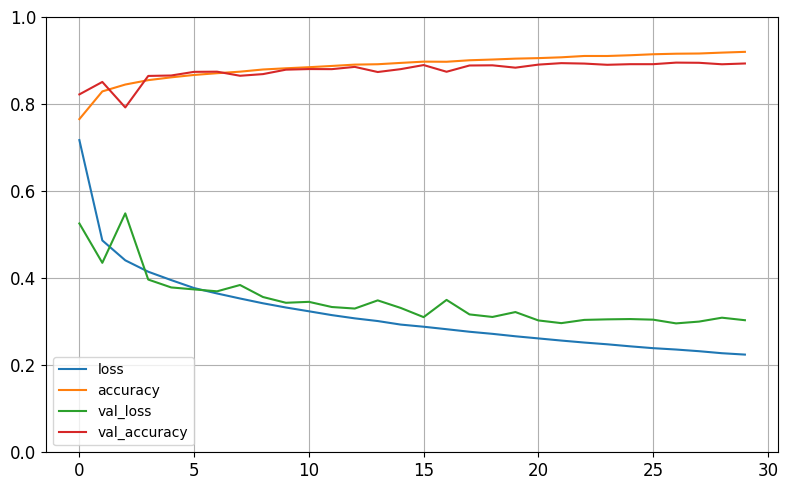

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [40]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3364 - accuracy: 0.8806


[0.3364318013191223, 0.8805999755859375]

In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 104ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.  , 0.95],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [42]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 22ms/step


array([9, 2, 1])

In [43]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [44]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


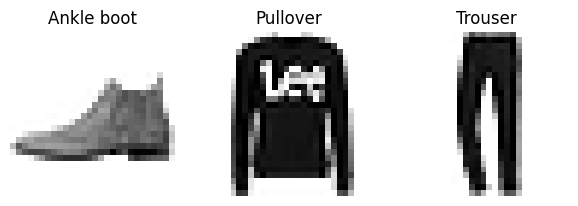

In [45]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [47]:
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.7761 - val_loss: 0.9646
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7924 - val_loss: 0.7631
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7117 - val_loss: 0.6392
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6532 - val_loss: 0.5953
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6124 - val_loss: 0.5735
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5792 - val_loss: 0.5258
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5543 - val_loss: 0.5109
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5342 - val_loss: 0.5042
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5159 - val_loss: 0.4739
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5014 - val_loss: 0.4605

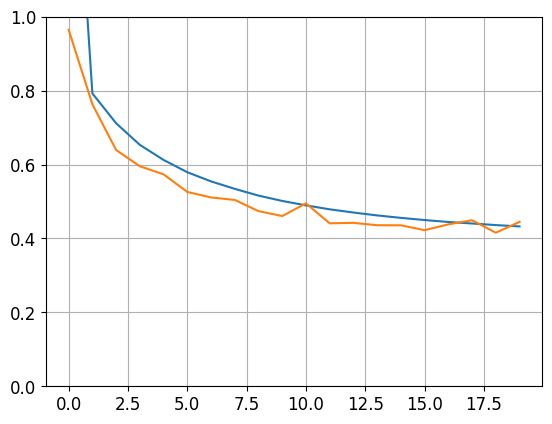

In [49]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [50]:
y_pred

array([[0.47419828],
       [1.579495  ],
       [3.4017353 ]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [51]:
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [53]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_5 (Dense)             (None, 30)                   270       ['input_1[0][0]']             
                                                                                                  
 dense_6 (Dense)             (None, 30)                   930       ['dense_5[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 38)                   0         ['input_1[0][0]',             
                                                                     'dense_6[0][0]']         

In [54]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 3s 4ms/step - loss: 1.7020 - val_loss: 1.2122
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6486 - val_loss: 0.5983
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5829 - val_loss: 0.5413
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5437 - val_loss: 0.5391
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5169 - val_loss: 0.5010
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4920 - val_loss: 0.4686
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4757 - val_loss: 0.4400
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4618 - val_loss: 0.4465
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4499 - val_loss: 0.4292
Epoch 10/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4407 - val_loss: 0.4099

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [55]:
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [57]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.6976 - val_loss: 2.4851
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8652 - val_loss: 0.9378
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7108 - val_loss: 0.6624
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6518 - val_loss: 0.6071
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6142 - val_loss: 0.5654
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5838 - val_loss: 0.5382
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5598 - val_loss: 0.5170
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5391 - val_loss: 0.4942
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5209 - val_loss: 0.4786
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5059 - val_loss: 0.4653

Adding an auxiliary output for regularization:

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [60]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [61]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 3s 5ms/step - loss: 2.8931 - main_output_loss: 2.8266 - aux_output_loss: 3.4918 - val_loss: 1.5933 - val_main_output_loss: 1.3203 - val_aux_output_loss: 4.0496
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 1.0039 - main_output_loss: 0.8550 - aux_output_loss: 2.3440 - val_loss: 1.0372 - val_main_output_loss: 0.7696 - val_aux_output_loss: 3.4456
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.7681 - main_output_loss: 0.6438 - aux_output_loss: 1.8873 - val_loss: 0.8666 - val_main_output_loss: 0.6190 - val_aux_output_loss: 3.0955
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.6872 - main_output_loss: 0.5780 - aux_output_loss: 1.6696 - val_loss: 0.7963 - val_main_output_loss: 0.5697 - val_aux_output_loss: 2.8354
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.6436 - main_output_loss: 0.5437 - aux_output_loss: 1.5427 - val_loss

In [62]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 1s 4ms/step - loss: 0.4864 - main_output_loss: 0.4259 - aux_output_loss: 1.0310


1/1 [==============================] - 0s 134ms/step


# The subclassing API

In [63]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [64]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 3s 4ms/step - loss: 2.8370 - output_1_loss: 2.6229 - output_2_loss: 4.7637 - val_loss: 3.5926 - val_output_1_loss: 1.8187 - val_output_2_loss: 19.5575
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 1.0079 - output_1_loss: 0.7274 - output_2_loss: 3.5321 - val_loss: 2.7915 - val_output_1_loss: 0.7503 - val_output_2_loss: 21.1616
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8002 - output_1_loss: 0.6091 - output_2_loss: 2.5210 - val_loss: 2.5723 - val_output_1_loss: 0.5710 - val_output_2_loss: 20.5845
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7119 - output_1_loss: 0.5721 - output_2_loss: 1.9701 - val_loss: 2.3331 - val_output_1_loss: 0.5443 - val_output_2_loss: 18.4332
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6606 - output_1_loss: 0.5492 - output_2_loss: 1.6629 - val_loss: 2.0707 - val_output_1_loss: 0.5233 - va

1/1 [==============================] - 0s 79ms/step


# Saving and Restoring

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

In [66]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [67]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.8806 - val_loss: 0.8515
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8058 - val_loss: 0.8014
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7287 - val_loss: 0.6866
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6759 - val_loss: 0.6269
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6345 - val_loss: 0.5912
Epoch 6/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5973 - val_loss: 0.5501
Epoch 7/10
363/363 [==============================] - 2s 4ms/step - loss: 0.5672 - val_loss: 0.5320
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5408 - val_loss: 0.5200
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5160 - val_loss: 0.4785
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4868


In [68]:
model.save("my_keras_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
model = keras.models.load_model("my_keras_model.h5")

In [70]:
model.predict(X_new)

1/1 [==============================] - 0s 67ms/step


array([[0.78814864],
       [1.3670862 ],
       [2.9240522 ]], dtype=float32)

In [71]:
model.save_weights("my_keras_weights.ckpt")

In [72]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [73]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [74]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [75]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.8884 - val_loss: 0.9320
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6957 - val_loss: 0.6471
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6230 - val_loss: 0.5942
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5863 - val_loss: 0.5527
Epoch 5/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5576 - val_loss: 0.5252
Epoch 6/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5325 - val_loss: 0.5041
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5113 - val_loss: 0.4836
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4933 - val_loss: 0.4706
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4782 - val_loss: 0.4621
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4472


In [76]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 0.4547 - val_loss: 0.4483
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4458 - val_loss: 0.4573
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4382 - val_loss: 0.4513
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4315 - val_loss: 0.4583
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4260 - val_loss: 0.4382
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4209 - val_loss: 0.4516
Epoch 7/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4167 - val_loss: 0.4450
Epoch 8/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4129 - val_loss: 0.4239
Epoch 9/100
363/363 [==============================] - 1s 4ms/step - loss: 0.4094 - val_loss: 0.4352
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4063 - val_lo

In [77]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [78]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

362/363 [============================>.] - ETA: 0s - loss: 0.3807
val/train: 1.04
363/363 [==============================] - 1s 3ms/step - loss: 0.3813 - val_loss: 0.3958


# Hyperparameter Tuning

In [90]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [92]:
from tensorflow import keras
from sklearn.base import BaseEstimator, RegressorMixin

# Modify the KerasRegressorWrapper class to accept hyperparameters
class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, n_hidden=1, n_neurons=200, learning_rate=1e-3):
        self.n_hidden = n_hidden
        self.n_neurons = n_neurons
        self.learning_rate = learning_rate

    def fit(self, X, y, **kwargs):
        self.model = build_model(self.n_hidden, self.n_neurons, self.learning_rate)
        self.model.fit(X, y, **kwargs)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Create an instance of the KerasRegressorWrapper
keras_reg = KerasRegressorWrapper()

In [93]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 2s 3ms/step - loss: 2.0244 - val_loss: 1.0289
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.7084 - val_loss: 0.6299
Epoch 3/100
363/363 [==============================] - 1s 3ms/step - loss: 0.6364 - val_loss: 0.6031
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5983 - val_loss: 0.5509
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5676 - val_loss: 0.5210
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5404 - val_loss: 0.4979
Epoch 7/100
363/363 [==============================] - 1s 3ms/step - loss: 0.5184 - val_loss: 0.4850
Epoch 8/100
363/363 [==============================] - 2s 5ms/step - loss: 0.5001 - val_loss: 0.4613
Epoch 9/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4841 - val_loss: 0.4460
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4710 - val_lo

KerasRegressorWrapper()

In [94]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step


In [95]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 22ms/step


In [96]:
np.random.seed(42)
tf.random.set_seed(42)

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon. In the meantime, I've added `.tolist()` and `.rvs(1000).tolist()` as workarounds.

In [97]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 0.8519 - val_loss: 0.4432
Epoch 2/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4480 - val_loss: 2.6516
Epoch 3/100
242/242 [==============================] - 1s 5ms/step - loss: 0.4955 - val_loss: 22.5511
Epoch 4/100
242/242 [==============================] - 1s 4ms/step - loss: 0.5587 - val_loss: 0.4098
Epoch 5/100
242/242 [==============================] - 1s 4ms/step - loss: 0.4411 - val_loss: 0.3976
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4337 - val_loss: 0.4023
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4290 - val_loss: 0.3988
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4305 - val_loss: 0.3912
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4346 - val_loss: 0.4070
Epoch 10/100
242/242 [=======

RandomizedSearchCV(cv=3, estimator=KerasRegressorWrapper(),
                   param_distributions={'learning_rate': [0.0016834549246003507,
                                                          0.023908364455931787,
                                                          0.008731907739399207,
                                                          0.004725396149933918,
                                                          0.0006154014789262349,
                                                          0.0006153331256530192,
                                                          0.00039200217714159834,
                                                          0.016198453229362288,
                                                          0.004779156784872304,
                                                          0.007821074275112302,
                                                          0.0003298300672429858,
                                                          0.026118062634914...
                                                          0.0050214257366256385,
                                                          0.0005703073595961107,
                                                          0.001151888789941251,
                                                          0.0016212311563941985,
                                                          0.0024505367684280496,
                                                          0.011155092541719619,
                                                          0.0007524347058135697,
                                                          0.003203244812844405,
                                                          0.004591455636549436,
                                                          0.0003715541189658279, ...],
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...]},
                   verbose=2)

In [98]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.0058036029342010235}

In [99]:
rnd_search_cv.best_score_

0.7584581488094471

In [100]:
rnd_search_cv.best_estimator_

KerasRegressorWrapper(learning_rate=0.0058036029342010235, n_hidden=3,
                      n_neurons=74)

In [101]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 2ms/step


0.7909010588953538

In [102]:
model = rnd_search_cv.best_estimator_.model
model

In [103]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2767


0.2766834795475006